<a href="https://colab.research.google.com/github/prabhat-parth/Real-time-heterogeneity-activity-recognition/blob/master/PURPOSED_CNN_MODEL_UCI_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

1.15.0


In [0]:
import numpy as np
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/UCI_HAR_DATA/UCI_HAR_Dataset/csv_files/train.csv")
train.head()
train.shape


(10299, 564)

In [0]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(train.duplicated())))


No of duplicates in DATA: 0


In [0]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(train.duplicated())))

No of duplicates in DATA: 0


In [0]:
#sns.heatmap(train.isnull(), cbar=True)

In [0]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,

In [0]:
train['ActivityName'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: ActivityName, dtype: int64

In [0]:
ActivityName= train['ActivityName'].value_counts().index
ActivityName

Index(['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS',
       'WALKING_DOWNSTAIRS'],
      dtype='object')

In [0]:
print(train.shape)


(10299, 564)


In [0]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,

In [0]:
train['tBodyAcc-mean()-X'] = train['tBodyAcc-mean()-X'].astype('float')
train['tBodyAcc-mean()-Y'] = train['tBodyAcc-mean()-Y'].astype('float')
train['tBodyAcc-mean()-Z'] = train['tBodyAcc-mean()-Z'].astype('float')



In [0]:
Fs = 20
gt= train['ActivityName'].value_counts().index
gt

Index(['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS',
       'WALKING_DOWNSTAIRS'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train['label'] = label.fit_transform(train['ActivityName'])
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName,label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.99606

In [0]:
label.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [0]:
X = train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z','tBodyAcc-std()-X','tBodyAcc-std()-Y','tBodyAcc-std()-Z']]
y = train['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z','tBodyAcc-std()-X','tBodyAcc-std()-Y','tBodyAcc-std()-Z'])
scaled_X['label'] = y.values

scaled_X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,label
0,0.210534,-0.068703,-0.452195,-0.883335,-0.945431,-0.744387,2
1,0.060208,0.035902,-0.275222,-0.890098,-0.929817,-0.860322,2
2,0.078460,-0.046427,-0.085548,-0.883565,-0.913598,-0.906457,2
3,0.071375,-0.227794,-0.270741,-0.885188,-0.946015,-0.935521,2
4,0.033738,0.031617,-0.121380,-0.889855,-0.940846,-0.935041,2
...,...,...,...,...,...,...,...
10294,0.529503,-0.960174,0.185107,0.729285,0.738886,0.985976,5
10295,1.316644,-0.578309,0.056759,0.689343,1.076214,1.032342,5
10296,1.118216,1.288059,-0.129415,0.634062,0.935694,0.899035,5
10297,-0.543493,0.975327,0.234320,0.648934,0.560590,1.004592,5


In [0]:
label.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [0]:
Fs = 50
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40


In [0]:
import math as m
def get_frames(data, frame_size):

  N_FEATURES = 6
  frames = []
  labels = []
  for i in range(0, len(scaled_X) - frame_size):
    x = train['tBodyAcc-mean()-X'].values[i: i + frame_size]
    y = train['tBodyAcc-mean()-Y'].values[i: i + frame_size]
    z = train['tBodyAcc-mean()-Z'].values[i: i + frame_size]
    x1 = train['tBodyAcc-std()-X'].values[i: i + frame_size]
    y2 = train['tBodyAcc-std()-Y'].values[i: i + frame_size]
    z3 = train['tBodyAcc-std()-Z'].values[i: i + frame_size]
    
        # Retrieve the most often used label in this segment
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x, y, z,x1, y2, z3])
    labels.append(label)
  # Bring the segments into a better shape
  frames = np.asarray(frames, dtype= np.float32).reshape(-1, frame_size, N_FEATURES)
  labels = np.asarray(labels)
  return frames, labels


In [0]:
X,y = get_frames(scaled_X, frame_size)

In [0]:
X.shape
y.shape

(10099,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)


In [0]:
X_train.shape, X_test.shape

((8079, 200, 6), (2020, 200, 6))

In [0]:
X_train = X_train.reshape(8079, 200,6,1)
X_test = X_test.reshape(2020, 200,6,1)
X_train.shape, X_test.shape

((8079, 200, 6, 1), (2020, 200, 6, 1))

In [0]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 6, 64)        640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 6, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 3, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              19661824  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         


In [0]:
from keras import optimizers
sgd = optimizers.adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=64, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8079 samples, validate on 2020 samples
Epoch 1/30





8079/8079 [==============================] - 19s 2ms/step - loss: 0.9466 - acc: 0.6693 - val_loss: 0.7073 - val_acc: 0.7421
Epoch 2/30
8079/8079 [==============================] - 4s 529us/step - loss: 0.6204 - acc: 0.7685 - val_loss: 0.5830 - val_acc: 0.7688
Epoch 3/30
8079/8079 [==============================] - 4s 533us/step - loss: 0.5089 - acc: 0.8101 - val_loss: 0.4836 - val_acc: 0.8084
Epoch 4/30
8079/8079 [==============================] - 4s 535us/step - loss: 0.4231 - acc: 0.8393 - val_loss: 0.4105 - val_acc: 0.8441
Epoch 5/30
8079/8079 [==============================] - 4s 532us/step - loss: 0.3681 - acc: 0.8585 - val_loss: 0.3589 - val_acc: 0.8644
Epoch 6/30
8079/8079 [==============================] - 4s 536us/step - loss: 0.3098 - acc: 0.8804 - val_loss: 0.3318 - val_acc: 0.8772
Epoch 7/30
8079/8079 [=============

In [0]:
#history.history['acc']
history.history['val_acc']

[0.74207920815685,
 0.7688118814241768,
 0.8084158412300714,
 0.844059405586507,
 0.8643564361156804,
 0.8772277224181902,
 0.8821782174676952,
 0.8920792075667051,
 0.9103960392498734,
 0.9297029701790007,
 0.9247524751294958,
 0.9292079206740502,
 0.9361386139794151,
 0.9415841582978126,
 0.945049505068524,
 0.944059406058623,
 0.9514851486328805,
 0.9524752478788395,
 0.954950495403592,
 0.9544554456625834,
 0.9495049508491366,
 0.955940593941377,
 0.9594059409481464,
 0.9504950493869215,
 0.9544554456625834,
 0.9599009904530968,
 0.9608910894629978,
 0.9599009904530968,
 0.9608910894629978,
 0.9534653468887405]

In [0]:
#history.history['loss']
history.history['val_loss']

[0.7073369775668229,
 0.5829776831192546,
 0.48355524115043114,
 0.4105313262136856,
 0.35890146576532045,
 0.33180243414227323,
 0.308323609120775,
 0.2731813600747892,
 0.23457750778387088,
 0.20042479604777724,
 0.1896755300536014,
 0.1904945971942184,
 0.18933698741516264,
 0.17071126227331634,
 0.1515400727196495,
 0.15509337841874302,
 0.14679618961740248,
 0.14263044259335736,
 0.15486793718715705,
 0.14173863229185046,
 0.1558314101530774,
 0.14098302090522086,
 0.13699875656921084,
 0.15739527586663124,
 0.1405212118484006,
 0.12573712403231327,
 0.11737651706922173,
 0.14003061646282083,
 0.12879916158052954,
 0.15999568665381705]

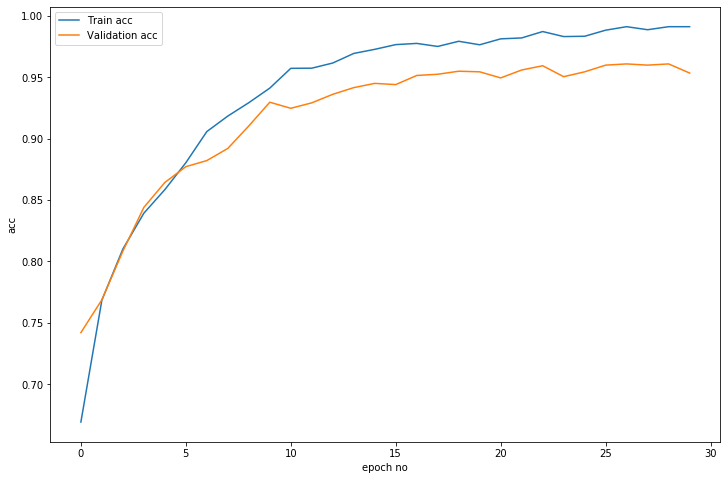

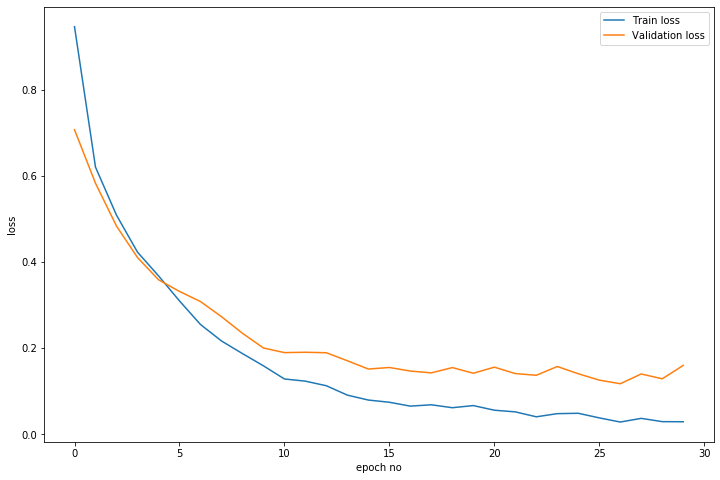

In [0]:
import matplotlib.pyplot as plt1

# Plot training & validation accuracy values
plt.figure(figsize=(12,8))
plt.plot(history.history['acc'],label='Train acc')
plt.plot(history.history['val_acc'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

[[516   4   1   6   3   1]
 [ 16 341   6   0   0   0]
 [  2   6 453   0   1   2]
 [  5   0   2 317   3   1]
 [  3   0   0   2 119   3]
 [  0   0   3   1   4 199]]
0.9628712871287128
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       531
           1       0.97      0.94      0.96       363
           2       0.97      0.98      0.98       464
           3       0.97      0.97      0.97       328
           4       0.92      0.94      0.93       127
           5       0.97      0.96      0.96       207

    accuracy                           0.96      2020
   macro avg       0.96      0.96      0.96      2020
weighted avg       0.96      0.96      0.96      2020



(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8cd183ba90>)

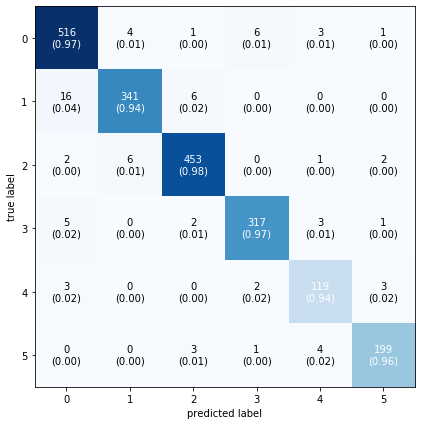

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()



Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 200, 6, 64)        640       
_________________________________________________________________
dropout_33 (Dropout)         (None, 200, 6, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 100, 3, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 19200)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 1024)              19661824  
_________________________________________________________________
dropout_34 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 6)               

In [0]:
from keras import optimizers
sgd = optimizers.adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=128, verbose=1)

Train on 8079 samples, validate on 2020 samples
Epoch 1/30
8079/8079 [==============================] - 3s 342us/step - loss: 1.1212 - acc: 0.6214 - val_loss: 0.7460 - val_acc: 0.7342
Epoch 2/30
8079/8079 [==============================] - 1s 126us/step - loss: 0.6889 - acc: 0.7481 - val_loss: 0.6673 - val_acc: 0.7441
Epoch 3/30
8079/8079 [==============================] - 1s 127us/step - loss: 0.5905 - acc: 0.7737 - val_loss: 0.5752 - val_acc: 0.7827
Epoch 4/30
8079/8079 [==============================] - 1s 124us/step - loss: 0.5167 - acc: 0.8032 - val_loss: 0.5308 - val_acc: 0.7936
Epoch 5/30
8079/8079 [==============================] - 1s 125us/step - loss: 0.4619 - acc: 0.8244 - val_loss: 0.4772 - val_acc: 0.8347
Epoch 6/30
8079/8079 [==============================] - 1s 124us/step - loss: 0.3971 - acc: 0.8521 - val_loss: 0.4409 - val_acc: 0.8347
Epoch 7/30
8079/8079 [==============================] - 1s 125us/step - loss: 0.3539 - acc: 0.8661 - val_loss: 0.3989 - val_acc: 0.8535


[[514   6   0   4   4   3]
 [ 14 347   1   0   0   1]
 [ 15  10 431   0   2   6]
 [  6   0   2 313   4   3]
 [  2   0   0   1 115   9]
 [  0   0   1   0   3 203]]
0.9519801980198019
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       531
           1       0.96      0.96      0.96       363
           2       0.99      0.93      0.96       464
           3       0.98      0.95      0.97       328
           4       0.90      0.91      0.90       127
           5       0.90      0.98      0.94       207

    accuracy                           0.95      2020
   macro avg       0.94      0.95      0.95      2020
weighted avg       0.95      0.95      0.95      2020



(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8cd0d36780>)

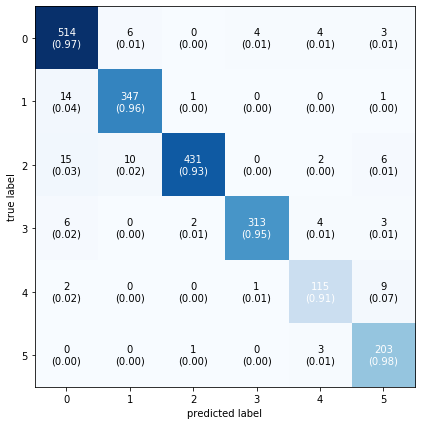

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 200, 6, 64)        640       
_________________________________________________________________
dropout_35 (Dropout)         (None, 200, 6, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 100, 3, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 19200)             0         
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              19661824  
_________________________________________________________________
dropout_36 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 6)               

In [0]:
from keras import optimizers
sgd = optimizers.adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=256, verbose=1)

Train on 8079 samples, validate on 2020 samples
Epoch 1/30
8079/8079 [==============================] - 2s 303us/step - loss: 1.1667 - acc: 0.5986 - val_loss: 0.8017 - val_acc: 0.7158
Epoch 2/30
8079/8079 [==============================] - 1s 88us/step - loss: 0.7253 - acc: 0.7336 - val_loss: 0.7265 - val_acc: 0.7287
Epoch 3/30
8079/8079 [==============================] - 1s 89us/step - loss: 0.6407 - acc: 0.7642 - val_loss: 0.6266 - val_acc: 0.7767
Epoch 4/30
8079/8079 [==============================] - 1s 88us/step - loss: 0.5683 - acc: 0.7878 - val_loss: 0.5707 - val_acc: 0.8040
Epoch 5/30
8079/8079 [==============================] - 1s 87us/step - loss: 0.5038 - acc: 0.8116 - val_loss: 0.5301 - val_acc: 0.8099
Epoch 6/30
8079/8079 [==============================] - 1s 86us/step - loss: 0.4540 - acc: 0.8279 - val_loss: 0.4789 - val_acc: 0.8307
Epoch 7/30
8079/8079 [==============================] - 1s 88us/step - loss: 0.3952 - acc: 0.8517 - val_loss: 0.4368 - val_acc: 0.8480
Epoch 

[[519   6   0   2   3   1]
 [ 13 349   1   0   0   0]
 [  6  15 442   0   1   0]
 [  6   0   1 320   0   1]
 [  5   0   0   1 118   3]
 [  2   0   8   1   2 194]]
0.9613861386138614
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.94      0.96      0.95       363
           2       0.98      0.95      0.97       464
           3       0.99      0.98      0.98       328
           4       0.95      0.93      0.94       127
           5       0.97      0.94      0.96       207

    accuracy                           0.96      2020
   macro avg       0.96      0.96      0.96      2020
weighted avg       0.96      0.96      0.96      2020



(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8cd0a88128>)

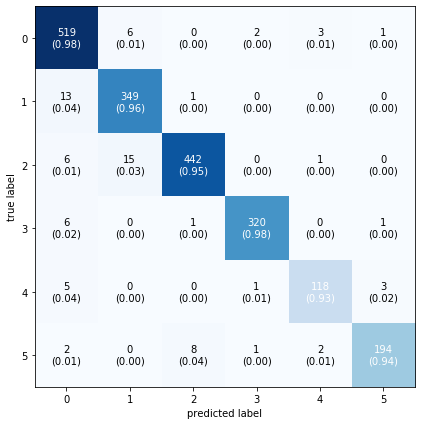

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 200, 6, 64)        640       
_________________________________________________________________
dropout_39 (Dropout)         (None, 200, 6, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 100, 3, 64)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 19200)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 1024)              19661824  
_________________________________________________________________
dropout_40 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 6)               

In [0]:
from keras import optimizers
sgd = optimizers.adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=512, verbose=1)

Train on 8079 samples, validate on 2020 samples
Epoch 1/30
8079/8079 [==============================] - 2s 287us/step - loss: 1.8047 - acc: 0.4747 - val_loss: 0.9957 - val_acc: 0.6282
Epoch 2/30
8079/8079 [==============================] - 1s 67us/step - loss: 0.9118 - acc: 0.6658 - val_loss: 0.8467 - val_acc: 0.6931
Epoch 3/30
8079/8079 [==============================] - 1s 66us/step - loss: 0.7845 - acc: 0.7204 - val_loss: 0.7782 - val_acc: 0.7158
Epoch 4/30
8079/8079 [==============================] - 1s 67us/step - loss: 0.7208 - acc: 0.7364 - val_loss: 0.7279 - val_acc: 0.7337
Epoch 5/30
8079/8079 [==============================] - 1s 68us/step - loss: 0.6636 - acc: 0.7541 - val_loss: 0.6846 - val_acc: 0.7554
Epoch 6/30
8079/8079 [==============================] - 1s 67us/step - loss: 0.6136 - acc: 0.7735 - val_loss: 0.6394 - val_acc: 0.7683
Epoch 7/30
8079/8079 [==============================] - 1s 66us/step - loss: 0.5661 - acc: 0.7919 - val_loss: 0.6071 - val_acc: 0.7728
Epoch 

[[504  18   0   3   4   2]
 [ 15 342   6   0   0   0]
 [  6  20 435   0   1   2]
 [  9   0   2 313   3   1]
 [  4   0   0   0 120   3]
 [  2   0   6   0   2 197]]
0.946039603960396
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.90      0.94      0.92       363
           2       0.97      0.94      0.95       464
           3       0.99      0.95      0.97       328
           4       0.92      0.94      0.93       127
           5       0.96      0.95      0.96       207

    accuracy                           0.95      2020
   macro avg       0.95      0.95      0.95      2020
weighted avg       0.95      0.95      0.95      2020



(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8cd075de48>)

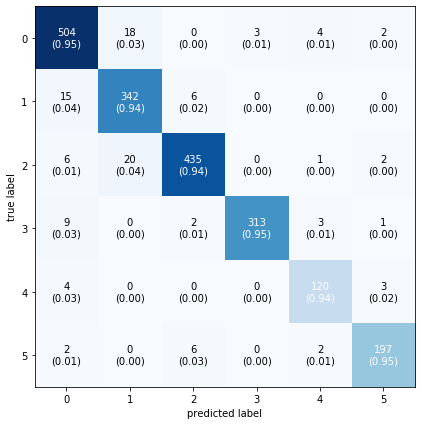

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()



Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 200, 6, 64)        640       
_________________________________________________________________
dropout_43 (Dropout)         (None, 200, 6, 64)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 100, 3, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 19200)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 1024)              19661824  
_________________________________________________________________
dropout_44 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 6)               

In [0]:
from keras import optimizers
sgd = optimizers.adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=1024, verbose=1)

Train on 8079 samples, validate on 2020 samples
Epoch 1/30
8079/8079 [==============================] - 2s 302us/step - loss: 2.0341 - acc: 0.3892 - val_loss: 1.1145 - val_acc: 0.5663
Epoch 2/30
8079/8079 [==============================] - 0s 58us/step - loss: 1.0609 - acc: 0.5996 - val_loss: 0.9688 - val_acc: 0.6188
Epoch 3/30
8079/8079 [==============================] - 0s 57us/step - loss: 0.9134 - acc: 0.6703 - val_loss: 0.8893 - val_acc: 0.6980
Epoch 4/30
8079/8079 [==============================] - 0s 58us/step - loss: 0.8229 - acc: 0.7031 - val_loss: 0.8128 - val_acc: 0.7104
Epoch 5/30
8079/8079 [==============================] - 0s 58us/step - loss: 0.7618 - acc: 0.7298 - val_loss: 0.7652 - val_acc: 0.7277
Epoch 6/30
8079/8079 [==============================] - 0s 57us/step - loss: 0.7171 - acc: 0.7402 - val_loss: 0.7261 - val_acc: 0.7401
Epoch 7/30
8079/8079 [==============================] - 0s 57us/step - loss: 0.6779 - acc: 0.7511 - val_loss: 0.6970 - val_acc: 0.7455
Epoch 

[[480  28  15   3   5   0]
 [ 30 314  19   0   0   0]
 [ 11  23 429   0   0   1]
 [ 13   0   3 309   2   1]
 [  4   0   0   2 116   5]
 [  2   0  11   1   6 187]]
0.9084158415841584
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       531
           1       0.86      0.87      0.86       363
           2       0.90      0.92      0.91       464
           3       0.98      0.94      0.96       328
           4       0.90      0.91      0.91       127
           5       0.96      0.90      0.93       207

    accuracy                           0.91      2020
   macro avg       0.92      0.91      0.91      2020
weighted avg       0.91      0.91      0.91      2020



(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8cd02d05f8>)

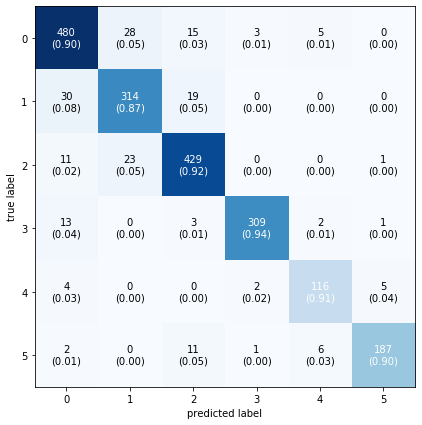

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))